In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("/Users/asim/Downloads/accident_prediction_india.csv",)

In [4]:
df.isnull().sum()

NameError: name 'df' is not defined

In [10]:
df['Traffic Control Presence'].fillna('No info',inplace = True)

/var/folders/jb/ccj4203j0ds9pntq6q78mq9c0000gn/T/ipykernel_9546/189937577.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Traffic Control Presence'].fillna('No info',inplace = True)


In [8]:
df['Driver License Status'].fillna('unknown', inplace = True)

/var/folders/jb/ccj4203j0ds9pntq6q78mq9c0000gn/T/ipykernel_9546/1336977623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driver License Status'].fillna('unknown', inplace = True)


,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,unknown,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,unknown,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,unknown,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,unknown,No,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Tamil Nadu,Chennai,2021,January,Sunday,1:15,Minor,5,Truck,4,...,National Highway,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection
2996,Uttarakhand,Unknown,2018,July,Sunday,10:12,Fatal,3,Car,3,...,Urban Road,Under Construction,Daylight,No info,86,23,Female,unknown,Yes,Intersection
2997,Meghalaya,Unknown,2021,January,Thursday,19:34,Minor,2,Two-Wheeler,8,...,National Highway,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection
2998,Meghalaya,Unknown,2023,June,Sunday,20:54,Fatal,1,Cycle,9,...,Urban Road,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge


In [14]:
month_map = {'January': 1 , 'February': 2 , 'March': 3 , 'April': 4,
             'May': 5 , 'June': 6 , 'July': 7 , 'August': 8 , 
             'September':9 , 'October': 10 , 'November': 11 , 'December':12}
df['month_num'] = df['Month'].map(month_map)
df['date'] = pd.to_datetime(dict(year = df['Year'] , month = df['month_num'] , day = 1))

In [16]:
df.dtypes

State Name                             object
City Name                              object
Year                                    int64
Month                                  object
Day of Week                            object
Time of Day                            object
Accident Severity                      object
Number of Vehicles Involved             int64
Vehicle Type Involved                  object
Number of Casualties                    int64
Number of Fatalities                    int64
Weather Conditions                     object
Road Type                              object
Road Condition                         object
Lighting Conditions                    object
Traffic Control Presence               object
Speed Limit (km/h)                      int64
Driver Age                              int64
Driver Gender                          object
Driver License Status                  object
Alcohol Involvement                    object
Accident Location Details         

In [18]:
df.set_index('date',inplace = True)

In [114]:
df.columns

Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details', 'month_num',
       'monthly_accidents'],
      dtype='object')

In [20]:
df.sort_values(by = 'date', inplace = True)

In [184]:
# Monthly accident count
monthly_accidents = df.resample('M').size()

# Yearly accident count
yearly_accidents = df.resample('Y').size()

# Quarterly trends
quarterly_accidents = df.resample('Q').size()

/var/folders/jb/ccj4203j0ds9pntq6q78mq9c0000gn/T/ipykernel_9546/2880019147.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_accidents = df.resample('M').size()
/var/folders/jb/ccj4203j0ds9pntq6q78mq9c0000gn/T/ipykernel_9546/2880019147.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_accidents = df.resample('Y').size()
/var/folders/jb/ccj4203j0ds9pntq6q78mq9c0000gn/T/ipykernel_9546/2880019147.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_accidents = df.resample('Q').size()


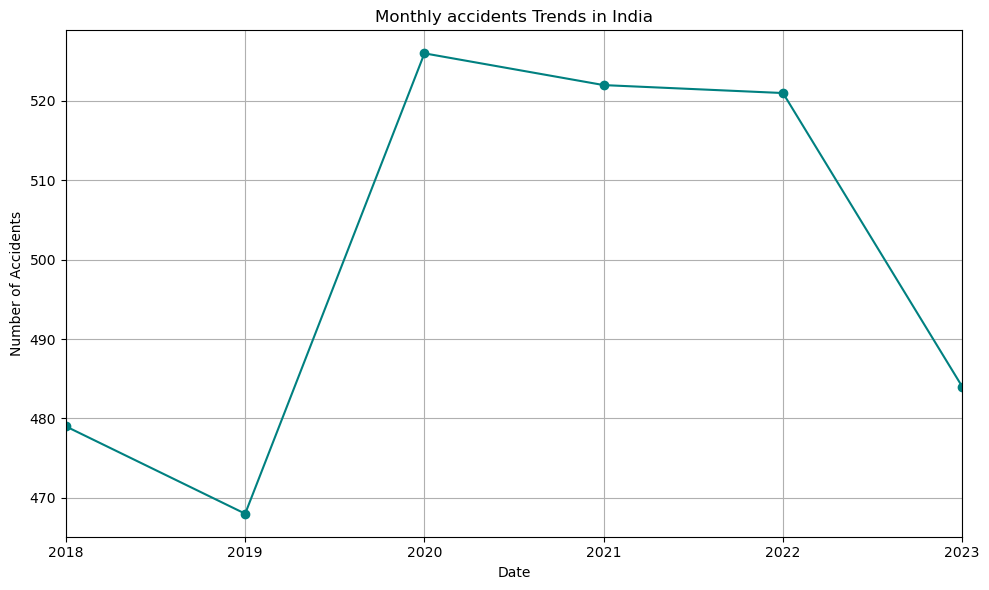

In [152]:
plt.figure(figsize = (10,6))
yearly_accidents.plot(marker = 'o' , color = 'teal')
plt.title('Monthly accidents Trends in India')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

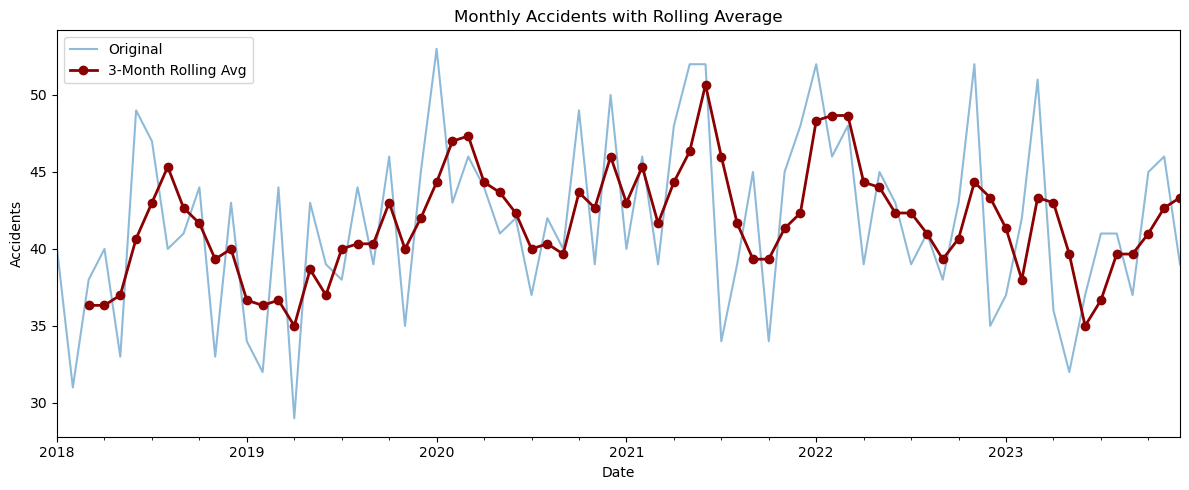

In [96]:
rolling_avg = monthly_accidents.rolling(window=3).mean()

plt.figure(figsize=(12, 5))
monthly_accidents.plot(label='Original', alpha=0.5)
rolling_avg.plot(label='3-Month Rolling Avg',marker = 'o', linewidth=2, color='darkred')
plt.title('Monthly Accidents with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Accidents')
plt.legend()
plt.tight_layout()
plt.show()

In [100]:
rolling_avg.tolist()

[nan,
 nan,
 36.333333333333336,
 36.333333333333336,
 37.0,
 40.666666666666664,
 43.0,
 45.333333333333336,
 42.666666666666664,
 41.666666666666664,
 39.333333333333336,
 40.0,
 36.666666666666664,
 36.333333333333336,
 36.666666666666664,
 35.0,
 38.666666666666664,
 37.0,
 40.0,
 40.333333333333336,
 40.333333333333336,
 43.0,
 40.0,
 42.0,
 44.333333333333336,
 47.0,
 47.333333333333336,
 44.333333333333336,
 43.666666666666664,
 42.333333333333336,
 40.0,
 40.333333333333336,
 39.666666666666664,
 43.666666666666664,
 42.666666666666664,
 46.0,
 43.0,
 45.333333333333336,
 41.666666666666664,
 44.333333333333336,
 46.333333333333336,
 50.666666666666664,
 46.0,
 41.666666666666664,
 39.333333333333336,
 39.333333333333336,
 41.333333333333336,
 42.333333333333336,
 48.333333333333336,
 48.666666666666664,
 48.666666666666664,
 44.333333333333336,
 44.0,
 42.333333333333336,
 42.333333333333336,
 41.0,
 39.333333333333336,
 40.666666666666664,
 44.333333333333336,
 43.33333333333

<Figure size 1200x1000 with 0 Axes>

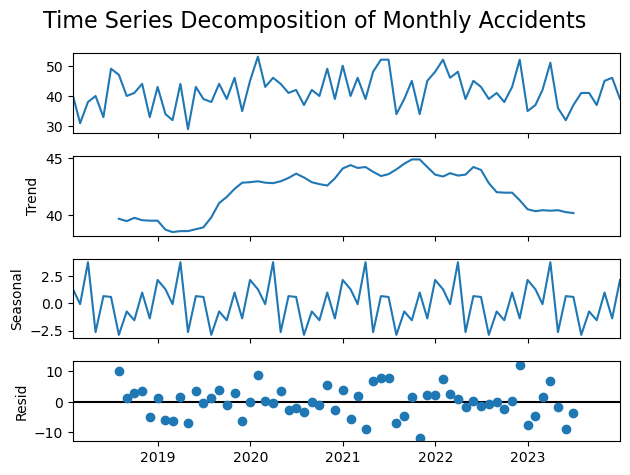

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Step 2: Decompose the time series
decomposition = seasonal_decompose(monthly_accidents, model='additive', period=12)

# Step 3: Plot the decomposed components
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.suptitle('Time Series Decomposition of Monthly Accidents', fontsize=16)
plt.tight_layout()
plt.show()

In [63]:
df['Driver Age avg'] = df['Driver Age'].mean()

Performing ADF Test...
ADF Statistic: -53.70295290556722
p-value: 0.0
Critical Values: {'1%': -3.43253236279788, '5%': -2.86250422682754, '10%': -2.5672832833096195}
The series is stationary.
Performing ADF Test...
ADF Statistic: -53.70295290556722
p-value: 0.0
Critical Values: {'1%': -3.43253236279788, '5%': -2.86250422682754, '10%': -2.5672832833096195}
The series is stationary.


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Driver Age   No. Observations:                 3000
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12459.550
Date:                Thu, 17 Apr 2025   AIC                          24925.100
Time:                        00:39:04   BIC                          24943.118
Sample:                             0   HQIC                         24931.581
                               - 3000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0186      0.018      1.019      0.308      -0.017       0.054
ma.L1         -0.9987      0.001   -836.649      0.000      -1.001      -0.996
sigma2       237.3007      9.655     24.578      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/jb/ccj4203j0ds9pntq6q78mq9c0000gn/T/ipykernel_89063/1961370901.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red', linestyle=':',)


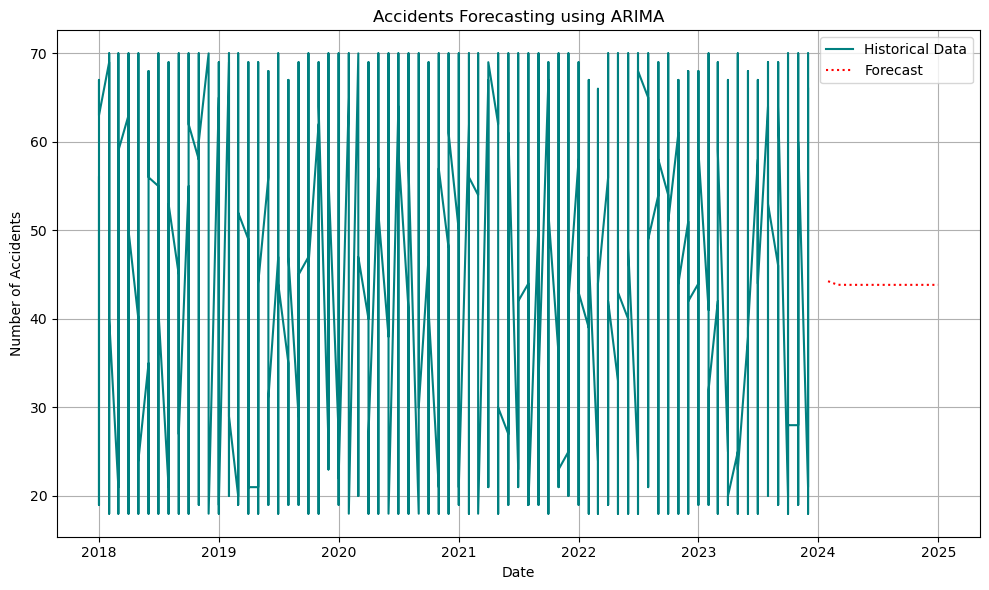

In [136]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

# Register converters to avoid warnings
register_matplotlib_converters()

# Sample DataFrame: Assume df is already a time series dataframe with a DateTime index
# Here, df['Accidents'] is the series you want to forecast

# 1. ADF Test for Stationarity
def adf_test(series):
    print("Performing ADF Test...")
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")
        
# Example: Running ADF test on the 'monthly_accidents' data
adf_test(df['Driver Age'])

# 2. Differencing the data if necessary (if series is non-stationary)
# For example, applying differencing if the series is non-stationary
df['Accidents_diff'] = df['Driver Age'].diff()

# Running ADF test again on differenced data
adf_test(df['Driver Age'].dropna())

# 3. Building the ARIMA model (p, d, q) - Here, we assume p=1, d=1, q=1 for simplicity
# The ideal parameters (p, d, q) should be selected using ACF/PACF plots or grid search

# Fit ARIMA model
model = ARIMA(df['Driver Age'], order=(1,1,1))  # p=1, d=1, q=1 for example
model_fit = model.fit()

# Print ARIMA model summary
print(model_fit.summary())

# 4. Forecasting
# Forecast the next 12 periods (months)
forecast = model_fit.forecast(steps=12)

# Create a plot to visualize the forecast
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Driver Age'], label='Historical Data', color='teal')
plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red', linestyle=':',)
plt.title('Accidents Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [148]:
df['Year'].tail()

date
2023-12-01    2023
2023-12-01    2023
2023-12-01    2023
2023-12-01    2023
2023-12-01    2023
Name: Year, dtype: int64

In [140]:
df

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,month_num,monthly_accidents,Driver Age avg,Accidents_diff
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,Bihar,Unknown,2018,January,Thursday,14:33,Fatal,4,Auto-Rickshaw,0,...,56,56,Male,Valid,No,Intersection,1,NaN,44.177,NaN
2018-01-01,Karnataka,Mangalore,2018,January,Wednesday,6:3,Minor,5,Cycle,9,...,100,45,Male,unknown,Yes,Curve,1,NaN,44.177,-11.0
2018-01-01,West Bengal,Kolkata,2018,January,Friday,11:11,Serious,5,Pedestrian,2,...,31,46,Male,Valid,Yes,Straight Road,1,NaN,44.177,1.0
2018-01-01,Gujarat,Vadodara,2018,January,Thursday,23:43,Fatal,2,Bus,4,...,92,63,Male,Valid,No,Intersection,1,NaN,44.177,17.0
2018-01-01,Rajasthan,Jodhpur,2018,January,Monday,12:47,Fatal,2,Cycle,0,...,89,61,Male,Expired,No,Bridge,1,NaN,44.177,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,Nagaland,Unknown,2023,December,Wednesday,6:41,Minor,2,Bus,6,...,43,32,Male,Expired,Yes,Intersection,12,NaN,44.177,2.0
2023-12-01,Telangana,Unknown,2023,December,Tuesday,10:25,Serious,5,Auto-Rickshaw,7,...,58,62,Male,Valid,No,Straight Road,12,NaN,44.177,30.0
2023-12-01,West Bengal,Kolkata,2023,December,Monday,14:41,Fatal,5,Truck,10,...,35,21,Female,unknown,No,Bridge,12,NaN,44.177,-41.0


In [54]:
df['Driver Age'].astype(int)

date
2018-01-01    56
2018-01-01    45
2018-01-01    46
2018-01-01    63
2018-01-01    61
              ..
2023-12-01    32
2023-12-01    62
2023-12-01    21
2023-12-01    46
2023-12-01    66
Name: Driver Age, Length: 3000, dtype: int64

In [61]:
df

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,month_num
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,Bihar,Unknown,2018,January,Thursday,14:33,Fatal,4,Auto-Rickshaw,0,...,Under Construction,Dusk,Signals,56,56,Male,Valid,No,Intersection,1
2018-01-01,Karnataka,Mangalore,2018,January,Wednesday,6:3,Minor,5,Cycle,9,...,Wet,Dawn,Signs,100,45,Male,unknown,Yes,Curve,1
2018-01-01,West Bengal,Kolkata,2018,January,Friday,11:11,Serious,5,Pedestrian,2,...,Dry,Dawn,Signals,31,46,Male,Valid,Yes,Straight Road,1
2018-01-01,Gujarat,Vadodara,2018,January,Thursday,23:43,Fatal,2,Bus,4,...,Damaged,Dawn,Signals,92,63,Male,Valid,No,Intersection,1
2018-01-01,Rajasthan,Jodhpur,2018,January,Monday,12:47,Fatal,2,Cycle,0,...,Under Construction,Dark,No info,89,61,Male,Expired,No,Bridge,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,Nagaland,Unknown,2023,December,Wednesday,6:41,Minor,2,Bus,6,...,Damaged,Daylight,Signs,43,32,Male,Expired,Yes,Intersection,12
2023-12-01,Telangana,Unknown,2023,December,Tuesday,10:25,Serious,5,Auto-Rickshaw,7,...,Dry,Dark,Signs,58,62,Male,Valid,No,Straight Road,12
2023-12-01,West Bengal,Kolkata,2023,December,Monday,14:41,Fatal,5,Truck,10,...,Wet,Dusk,No info,35,21,Female,unknown,No,Bridge,12


In [65]:
df

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,month_num,Driver Age avg
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,Bihar,Unknown,2018,January,Thursday,14:33,Fatal,4,Auto-Rickshaw,0,...,Dusk,Signals,56,56,Male,Valid,No,Intersection,1,44.177
2018-01-01,Karnataka,Mangalore,2018,January,Wednesday,6:3,Minor,5,Cycle,9,...,Dawn,Signs,100,45,Male,unknown,Yes,Curve,1,44.177
2018-01-01,West Bengal,Kolkata,2018,January,Friday,11:11,Serious,5,Pedestrian,2,...,Dawn,Signals,31,46,Male,Valid,Yes,Straight Road,1,44.177
2018-01-01,Gujarat,Vadodara,2018,January,Thursday,23:43,Fatal,2,Bus,4,...,Dawn,Signals,92,63,Male,Valid,No,Intersection,1,44.177
2018-01-01,Rajasthan,Jodhpur,2018,January,Monday,12:47,Fatal,2,Cycle,0,...,Dark,No info,89,61,Male,Expired,No,Bridge,1,44.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,Nagaland,Unknown,2023,December,Wednesday,6:41,Minor,2,Bus,6,...,Daylight,Signs,43,32,Male,Expired,Yes,Intersection,12,44.177
2023-12-01,Telangana,Unknown,2023,December,Tuesday,10:25,Serious,5,Auto-Rickshaw,7,...,Dark,Signs,58,62,Male,Valid,No,Straight Road,12,44.177
2023-12-01,West Bengal,Kolkata,2023,December,Monday,14:41,Fatal,5,Truck,10,...,Dusk,No info,35,21,Female,unknown,No,Bridge,12,44.177


<Axes: xlabel='date'>

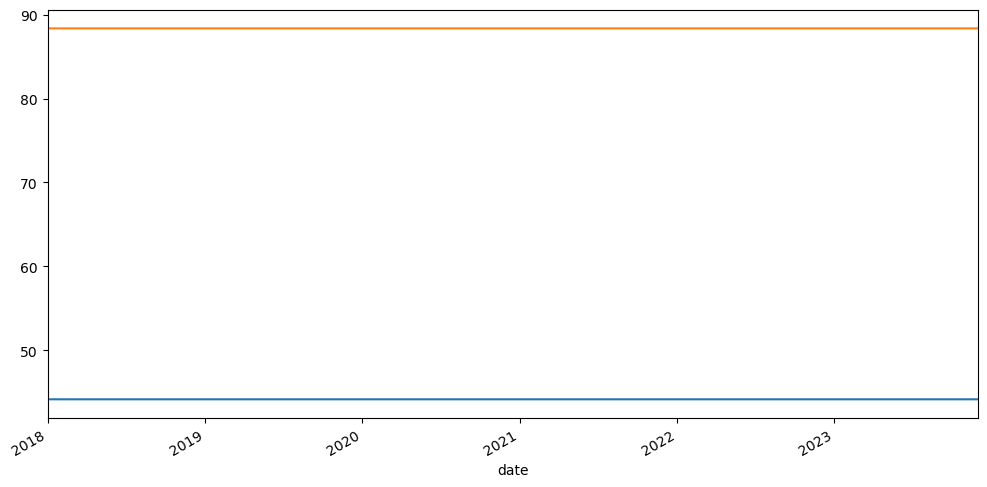

In [79]:
df['Driver Age avg'].plot(figsize=(12,6)).autoscale(axis = 'x' , tight = True)
df.rolling(window = 2)['Driver Age avg'].sum().plot()

In [81]:
df

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,month_num,Driver Age avg
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,Bihar,Unknown,2018,January,Thursday,14:33,Fatal,4,Auto-Rickshaw,0,...,Dusk,Signals,56,56,Male,Valid,No,Intersection,1,44.177
2018-01-01,Karnataka,Mangalore,2018,January,Wednesday,6:3,Minor,5,Cycle,9,...,Dawn,Signs,100,45,Male,unknown,Yes,Curve,1,44.177
2018-01-01,West Bengal,Kolkata,2018,January,Friday,11:11,Serious,5,Pedestrian,2,...,Dawn,Signals,31,46,Male,Valid,Yes,Straight Road,1,44.177
2018-01-01,Gujarat,Vadodara,2018,January,Thursday,23:43,Fatal,2,Bus,4,...,Dawn,Signals,92,63,Male,Valid,No,Intersection,1,44.177
2018-01-01,Rajasthan,Jodhpur,2018,January,Monday,12:47,Fatal,2,Cycle,0,...,Dark,No info,89,61,Male,Expired,No,Bridge,1,44.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,Nagaland,Unknown,2023,December,Wednesday,6:41,Minor,2,Bus,6,...,Daylight,Signs,43,32,Male,Expired,Yes,Intersection,12,44.177
2023-12-01,Telangana,Unknown,2023,December,Tuesday,10:25,Serious,5,Auto-Rickshaw,7,...,Dark,Signs,58,62,Male,Valid,No,Straight Road,12,44.177
2023-12-01,West Bengal,Kolkata,2023,December,Monday,14:41,Fatal,5,Truck,10,...,Dusk,No info,35,21,Female,unknown,No,Bridge,12,44.177


In [107]:
df['Time of Day']= pd.to_datetime(df['Time of Day'],format = '%H:%M:%S')

In [109]:
df['accident per hour'] = df['Time of Day'].dt.hour

In [113]:
df

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,month_num,Driver Age avg,accident per hour
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,Bihar,Unknown,2018,January,Thursday,1900-01-01 14:33:00,Fatal,4,Auto-Rickshaw,0,...,Signals,56,56,Male,Valid,No,Intersection,1,44.177,14
2018-01-01,Karnataka,Mangalore,2018,January,Wednesday,1900-01-01 06:03:00,Minor,5,Cycle,9,...,Signs,100,45,Male,unknown,Yes,Curve,1,44.177,6
2018-01-01,West Bengal,Kolkata,2018,January,Friday,1900-01-01 11:11:00,Serious,5,Pedestrian,2,...,Signals,31,46,Male,Valid,Yes,Straight Road,1,44.177,11
2018-01-01,Gujarat,Vadodara,2018,January,Thursday,1900-01-01 23:43:00,Fatal,2,Bus,4,...,Signals,92,63,Male,Valid,No,Intersection,1,44.177,23
2018-01-01,Rajasthan,Jodhpur,2018,January,Monday,1900-01-01 12:47:00,Fatal,2,Cycle,0,...,No info,89,61,Male,Expired,No,Bridge,1,44.177,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,Nagaland,Unknown,2023,December,Wednesday,1900-01-01 06:41:00,Minor,2,Bus,6,...,Signs,43,32,Male,Expired,Yes,Intersection,12,44.177,6
2023-12-01,Telangana,Unknown,2023,December,Tuesday,1900-01-01 10:25:00,Serious,5,Auto-Rickshaw,7,...,Signs,58,62,Male,Valid,No,Straight Road,12,44.177,10
2023-12-01,West Bengal,Kolkata,2023,December,Monday,1900-01-01 14:41:00,Fatal,5,Truck,10,...,No info,35,21,Female,unknown,No,Bridge,12,44.177,14


In [121]:
df['accident per day'] = pd.to_datetime(df['accident per day'])

In [142]:
df['date_only'] = df['Time of Day'].dt.date

In [148]:
df['date and total accidents'] = df.groupby('date')['accident per hour'].size().sort_values(ascending = True)

In [150]:
df

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,month_num,Driver Age avg,accident per hour,accident per day,date_only,date and total accidents
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,Bihar,Unknown,2018,January,Thursday,1900-01-01 14:33:00,Fatal,4,Auto-Rickshaw,0,...,Male,Valid,No,Intersection,1,44.177,14,1,1900-01-01,40
2018-01-01,Karnataka,Mangalore,2018,January,Wednesday,1900-01-01 06:03:00,Minor,5,Cycle,9,...,Male,unknown,Yes,Curve,1,44.177,6,1,1900-01-01,40
2018-01-01,West Bengal,Kolkata,2018,January,Friday,1900-01-01 11:11:00,Serious,5,Pedestrian,2,...,Male,Valid,Yes,Straight Road,1,44.177,11,1,1900-01-01,40
2018-01-01,Gujarat,Vadodara,2018,January,Thursday,1900-01-01 23:43:00,Fatal,2,Bus,4,...,Male,Valid,No,Intersection,1,44.177,23,1,1900-01-01,40
2018-01-01,Rajasthan,Jodhpur,2018,January,Monday,1900-01-01 12:47:00,Fatal,2,Cycle,0,...,Male,Expired,No,Bridge,1,44.177,12,1,1900-01-01,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,Nagaland,Unknown,2023,December,Wednesday,1900-01-01 06:41:00,Minor,2,Bus,6,...,Male,Expired,Yes,Intersection,12,44.177,6,1,1900-01-01,39
2023-12-01,Telangana,Unknown,2023,December,Tuesday,1900-01-01 10:25:00,Serious,5,Auto-Rickshaw,7,...,Male,Valid,No,Straight Road,12,44.177,10,1,1900-01-01,39
2023-12-01,West Bengal,Kolkata,2023,December,Monday,1900-01-01 14:41:00,Fatal,5,Truck,10,...,Female,unknown,No,Bridge,12,44.177,14,1,1900-01-01,39


<Axes: xlabel='date'>

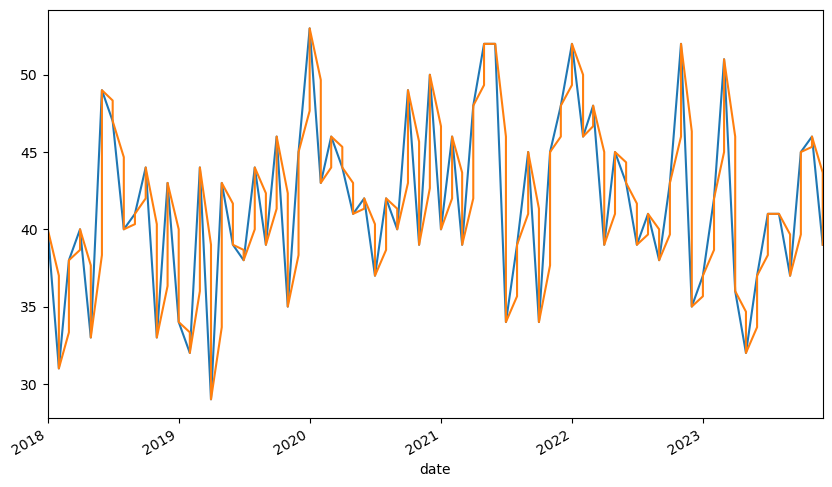

In [168]:
df['date and total accidents'].plot(figsize = (10,6)).autoscale(axis = 'x',tight = True)
df.rolling(window = 3)['date and total accidents'].mean().plot()

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose


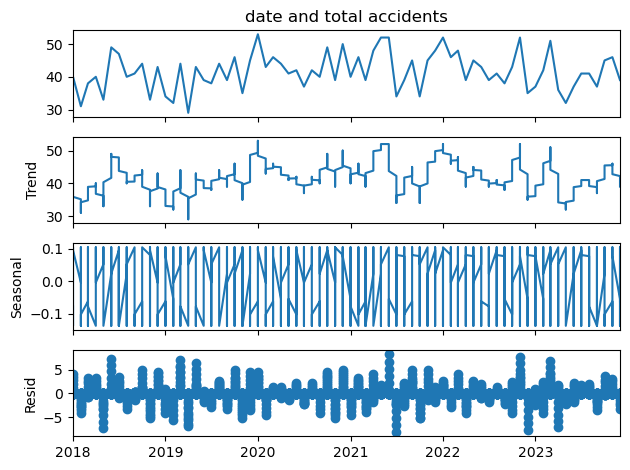

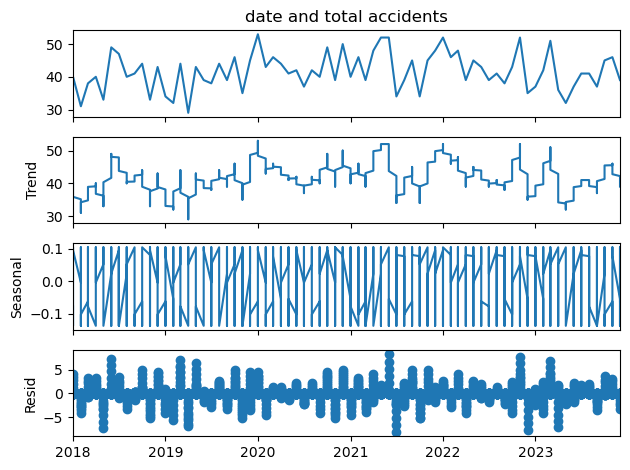

In [200]:
 decomposition = seasonal_decompose(df['date and total accidents'],model = ' additive',period = 12)
decomposition.plot()

In [216]:
ewma = monthly_accidents.ewm(alpha=0.5).mean()

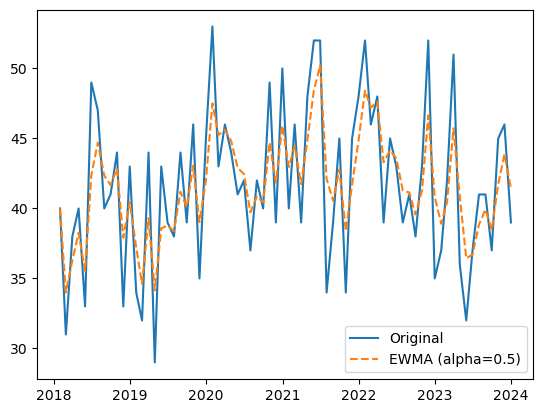

In [218]:
plt.plot(monthly_accidents, label='Original')
plt.plot(ewma, label='EWMA (alpha=0.5)', linestyle='--')
plt.legend()
plt.show()

In [220]:
from statsmodels.tsa.holtwinters import Holt

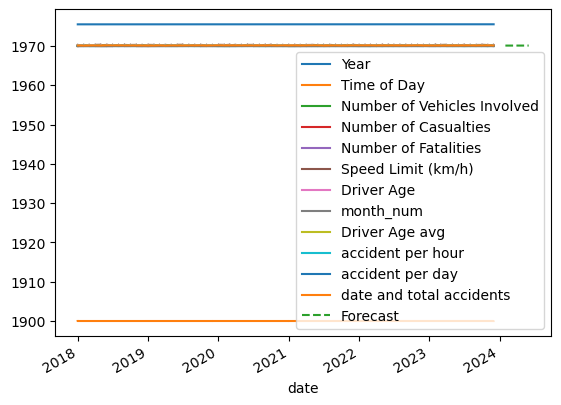

In [222]:
model  = Holt(monthly_accidents)
fit  = model.fit()
forecast = fit.forecast(steps = 5)
df.plot(label='Original')
forecast.plot(label='Forecast', linestyle='--')
plt.legend()
plt.show()

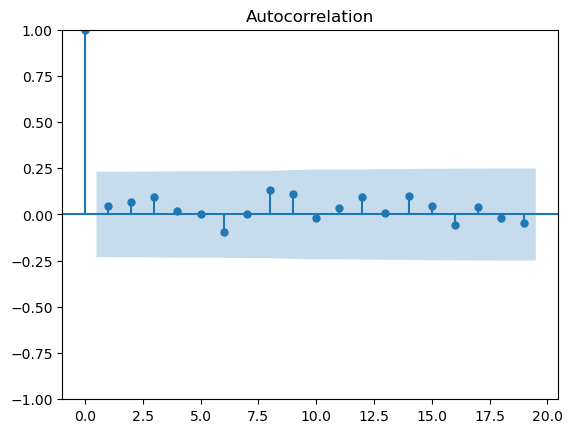

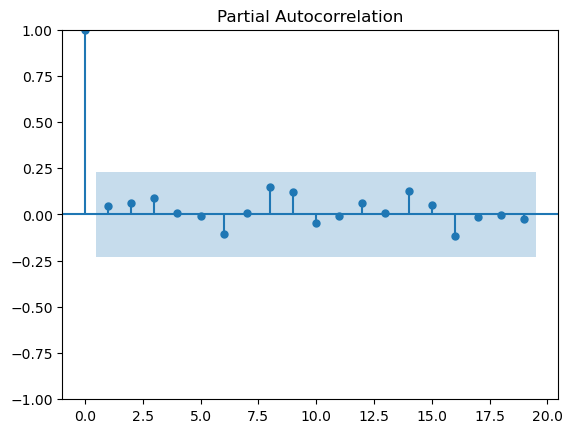

In [226]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(monthly_accidents)
plot_pacf(monthly_accidents)
plt.show()

In [228]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_accidents, order=(2,1,2))  # p=2, d=1, q=2
result = model.fit()

# Forecast next 5
forecast = result.forecast(steps=5)
print(forecast)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2024-01-31    41.302548
2024-02-29    41.318624
2024-03-31    41.197285
2024-04-30    41.317945
2024-05-31    41.202776
Freq: ME, Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83275D+00    |proj g|=  6.59985D-02

At iterate    5    f=  2.76923D+00    |proj g|=  7.80521D-03

At iterate   10    f=  2.76648D+00    |proj g|=  3.71739D-03

At iterate   15    f=  2.76621D+00    |proj g|=  3.89552D-03

At iterate   20    f=  2.76607D+00    |proj g|=  2.02038D-03

At iterate   25    f=  2.76604D+00    |proj g|=  4.85259D-04

At iterate   30    f=  2.76603D+00    |proj g|=  1.49060D-04

At iterate   35    f=  2.76603D+00    |proj g|=  3.01243D-04

At iterate   40    f=  2.76603D+00    |proj g|=  6.66800D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

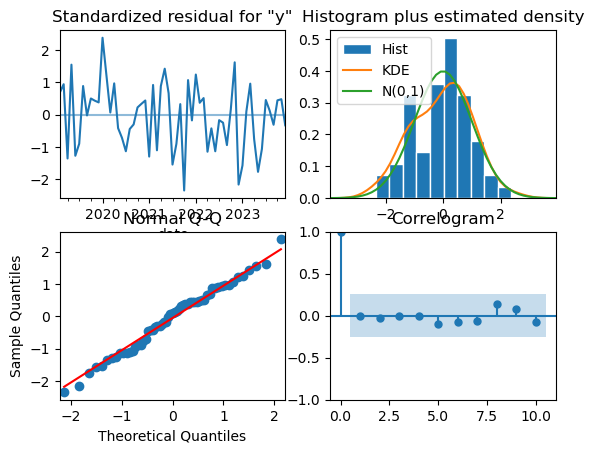

In [232]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(monthly_accidents, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()
results.plot_diagnostics()
plt.show()